<a href="https://colab.research.google.com/github/Kriti-Saxena/Congressional-Analytics/blob/main/AWS_PROJECT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Effects on Climate Change on Hummingbird Habitat**

#### Kriti Saxena (krsaxena@calpoly.edu)

#### Shivani Negi (shnegi@calpoly.edu)

link to data : https://drive.google.com/file/d/1XVHnUaV-pkMzD9IweSHyKKNNPBjlemPf/view?usp=share_link

# **Introduction and Hypothesis**

By 2080, Allen's hummingbird is expected to lose 90 percent of its current breeding range, according to Audubon’s climate models. Our hypothesis is that over the last 10 years, allen's hummingbird has been moving to higher elevations as a result of global warming. Anna's hummingbird, another common species on the West Coast, can already be discovered at elevations ranging from 10-2,800 meters (33-9,186 feet). Allen's Hummingbirds, on the other hand, tend to live in a narrow strip of coastal forest, scrub, and chaparral from sea level to around 1,000 feet elevation along the West Coast. Due to climate change, Allen's hummingbird may be forced to move to higher elevations, as well.

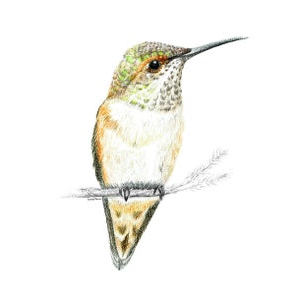



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import sqlite3
from pathlib import Path as Path
from collections import Counter


from google.colab import drive
drive.mount('/content/drive')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
#sns.axes_style("darkgrid")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bird.csv"))
data['observation_date']= pd.to_datetime(data['observation_date'])
bird_data_csv = data.to_csv("bird.csv")

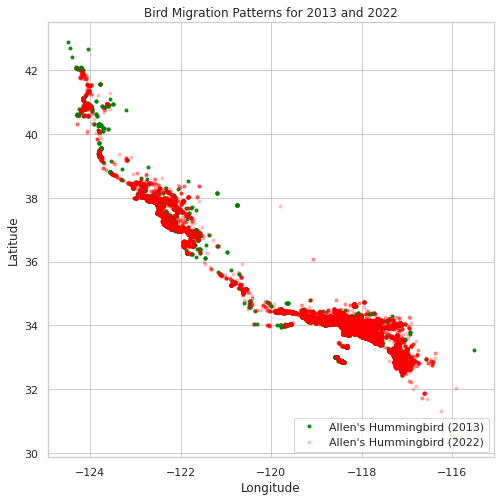

In [ ]:
# 1st
birddata = pd.read_csv("bird.csv")
bird_names = pd.unique(birddata.common_name)

birddata['observation_date'] = pd.to_datetime(birddata['observation_date'])
birddata['year'] = birddata['observation_date'].dt.year

year1 = 2013
year2 = 2022

plt.figure(figsize=(8, 8))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Bird Migration Patterns for {year1} and {year2}")
for bird_name in bird_names:
    ix1 = (birddata.common_name == bird_name) & (birddata.year == year1)
    ix2 = (birddata.common_name == bird_name) & (birddata.year == year2)
    x1, y1 = birddata.longitude[ix1], birddata.latitude[ix1]
    x2, y2 = birddata.longitude[ix2], birddata.latitude[ix2]
    plt.plot(x1, y1, ".", label=f"{bird_name} ({year1})", alpha=0.90, color="green")
    plt.plot(x2, y2, ".", label=f"{bird_name} ({year2})", alpha=0.20, color="red")

plt.legend(loc="lower right")
plt.show()


<ipython-input-4-7f3610143537>:20: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if (x1.values == x2.values) and (y1.values == y2.values):


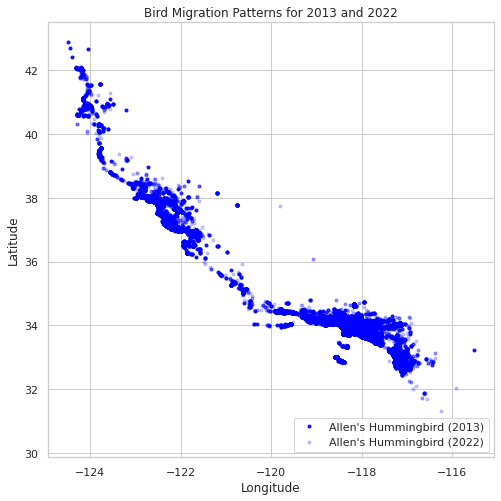

In [ ]:
# 2nd
birddata = pd.read_csv("bird.csv")
bird_names = pd.unique(birddata.common_name)

birddata['observation_date'] = pd.to_datetime(birddata['observation_date'])
birddata['year'] = birddata['observation_date'].dt.year

year1 = 2013
year2 = 2022

plt.figure(figsize=(8, 8))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Bird Migration Patterns for {year1} and {year2}")
for bird_name in bird_names:
    ix1 = (birddata.common_name == bird_name) & (birddata.year == year1)
    ix2 = (birddata.common_name == bird_name) & (birddata.year == year2)
    x1, y1 = birddata.longitude[ix1], birddata.latitude[ix1]
    x2, y2 = birddata.longitude[ix2], birddata.latitude[ix2]
    
    if (x1.values == x2.values) and (y1.values == y2.values):
        plt.plot(x1, y1, ".", label=f"{bird_name} ({year1})", alpha=0.90, color="green")
        plt.plot(x2, y2, ".", label=f"{bird_name} ({year2})", alpha=0.90, color="green")
    else:
        plt.plot(x1, y1, ".", label=f"{bird_name} ({year1})", alpha=0.90, color="blue")
        plt.plot(x2, y2, ".", label=f"{bird_name} ({year2})", alpha=0.20, color="blue")

plt.legend(loc="lower right")
plt.show()


In [ ]:
# 3rd
def haversine(lat1, lon1, lat2, lon2):
    R = 6371 
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    d = R * c
    return (d * 0.621371)[0]

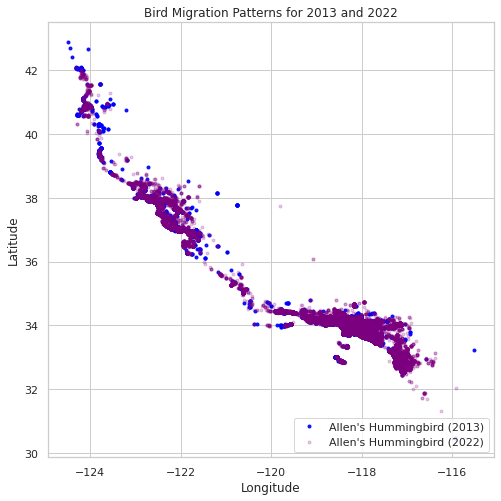

In [ ]:
bird_names = pd.unique(birddata.common_name)

birddata['observation_date'] = pd.to_datetime(birddata['observation_date'])
birddata['year'] = birddata['observation_date'].dt.year

year1 = 2013
year2 = 2022

threshold_distance = 50
plt.figure(figsize=(8, 8))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Bird Migration Patterns for {year1} and {year2}")
for bird_name in bird_names:
    ix1 = (birddata.common_name == bird_name) & (birddata.year == year1)
    ix2 = (birddata.common_name == bird_name) & (birddata.year == year2)
    x1, y1 = birddata.longitude[ix1], birddata.latitude[ix1]
    x2, y2 = birddata.longitude[ix2], birddata.latitude[ix2]
    
    distance = haversine(x1, y1, x2, y2)
    
    if distance <= threshold_distance:
        plt.plot(x1, y1, ".", label=f"{bird_name} ({year1})", alpha=0.90, color="green")
        plt.plot(x2, y2, ".", label=f"{bird_name} ({year2})", alpha=0.90, color="green")
    else:
        plt.plot(x1, y1, ".", label=f"{bird_name} ({year1})", alpha=0.90, color="purple")
        plt.plot(x2, y2, ".", label=f"{bird_name} ({year2})", alpha=0.2, color="purple")
plt.legend(loc="lower right")
plt.show()



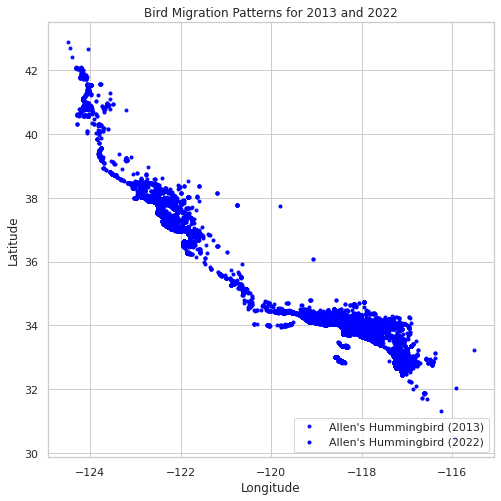

In [ ]:
# 4th 
birddata = pd.read_csv("bird.csv")
bird_names = pd.unique(birddata.common_name)

birddata['observation_date'] = pd.to_datetime(birddata['observation_date'])
birddata['year'] = birddata['observation_date'].dt.year

year1 = 2013
year2 = 2022

plt.figure(figsize=(8, 8))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Bird Migration Patterns for {year1} and {year2}")

for bird_name in bird_names:
    ix1 = (birddata.common_name == bird_name) & (birddata.year == year1)
    ix2 = (birddata.common_name == bird_name) & (birddata.year == year2)
    
    
    loc1 = list(zip(birddata.longitude[ix1], birddata.latitude[ix1]))
    loc2 = list(zip(birddata.longitude[ix2], birddata.latitude[ix2]))
    
    
    if loc1 == loc2:
        color = "yellow"
    else:
        color = "blue"
        
    plt.plot(birddata.longitude[ix1], birddata.latitude[ix1], ".", label=f"{bird_name} ({year1})", alpha=0.90, color=color)
    plt.plot(birddata.longitude[ix2], birddata.latitude[ix2], ".", label=f"{bird_name} ({year2})", alpha=1.0, color=color)

plt.legend(loc="lower right")
plt.show()


In [ ]:
# keeps crashing 
import numpy as np

birddata = pd.read_csv('bird.csv')

birddata["latitude_rad"] = np.radians(birddata["latitude"])
birddata["longitude_rad"] = np.radians(birddata["longitude"])


lat1 = birddata["latitude_rad"].values.reshape(-1, 1)
lon1 = birddata["longitude_rad"].values.reshape(-1, 1)
lat2 = birddata["latitude_rad"].values.reshape(1, -1)
lon2 = birddata["longitude_rad"].values.reshape(1, -1)
delta_lat = lat2 - lat1
delta_lon = lon2 - lon1
a = np.sin(delta_lat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(delta_lon / 2) ** 2
c = 2 * np.arcsin(np.sqrt(a))
distance_matrix = 6371 * c


birddata["color"] = "green"
birddata.loc[(distance_matrix < 1) & (distance_matrix > 0), "color"] = "yellow"


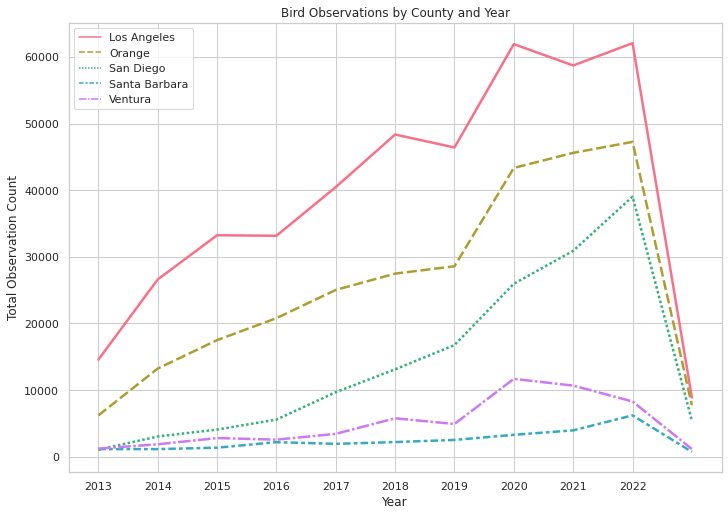

In [ ]:
bird_data = pd.read_csv('bird.csv')

bird_data['observation_date'] = pd.to_datetime(bird_data['observation_date'], format='%Y-%m-%d')
bird_data['year'] = bird_data['observation_date'].dt.year

filter_south_cal = ['Los Angeles', 'Orange', 'San Diego', 'Ventura', 'Santa Barbara']
bird_data = bird_data[bird_data.county.isin(filter_south_cal)]

counts_by_county_year = bird_data.groupby(["county", "year"]).observation_count.sum()

counts_by_county = counts_by_county_year.unstack(level=0)

sns.lineplot(data=counts_by_county, palette="husl", linewidth=2.5)
plt.xlabel("Year")
plt.ylabel("Total Observation Count")
plt.title("Bird Observations by County and Year")
plt.legend(loc="upper left")
plt.xticks([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
plt.show()

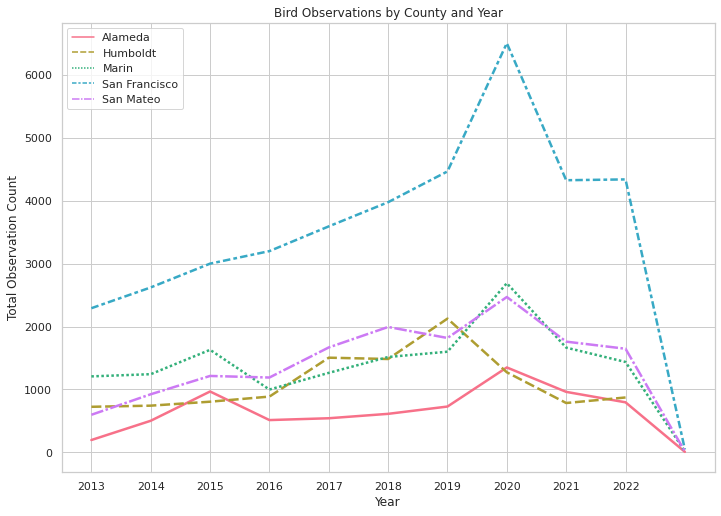

In [ ]:
bird_data = pd.read_csv('bird.csv')

bird_data['observation_date'] = pd.to_datetime(bird_data['observation_date'], format='%Y-%m-%d')
bird_data['year'] = bird_data['observation_date'].dt.year

filter_north_cal = ['San Francisco', 'San Mateo', 'Marin', 'Humboldt', 'Alameda']
bird_data = bird_data[bird_data.county.isin(filter_north_cal)]

counts_by_county_year = bird_data.groupby(["county", "year"]).observation_count.sum()

counts_by_county = counts_by_county_year.unstack(level=0)

sns.lineplot(data=counts_by_county, palette="husl", linewidth=2.5)
plt.xlabel("Year")
plt.ylabel("Total Observation Count")
plt.title("Bird Observations by County and Year")
plt.legend(loc="upper left")
plt.xticks([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
plt.show()

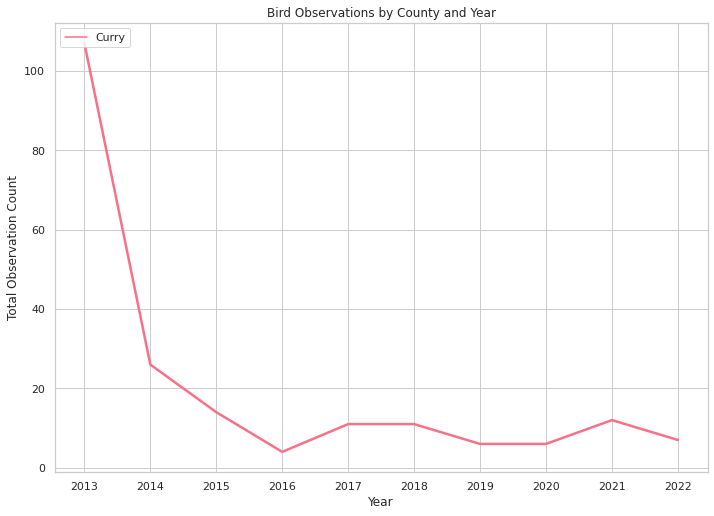

In [ ]:
bird_data = pd.read_csv('bird.csv')
#bird_data['observation_count'] = pd.to_numeric(bird_data['observation_count'], errors='coerce')

bird_data['observation_date'] = pd.to_datetime(bird_data['observation_date'], format='%Y-%m-%d')
bird_data['year'] = bird_data['observation_date'].dt.year

filter_oregon = ['Curry']
bird_data = bird_data[bird_data.county.isin(filter_oregon)]

counts_by_county_year = bird_data.groupby(["county", "year"]).observation_count.sum()

counts_by_county = counts_by_county_year.unstack(level=0)

sns.lineplot(data=counts_by_county, palette='husl', linewidth=2.5)
plt.xlabel("Year")
plt.ylabel("Total Observation Count")
plt.title("Bird Observations by County and Year")
plt.legend(loc="upper left")
plt.xticks([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
plt.show()

# **Data Exploration**

In [ ]:
Path('bird.db').touch()
data_bird_conn = sqlite3.connect('bird.db')
data_bird_cursor = data_bird_conn.cursor()
data.to_sql('bird.csv', data_bird_conn, if_exists='append', index=False)

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [ ]:
California_10 = pd.read_sql('''SELECT state_code, county, SUM(observation_count) AS Count FROM 'bird.csv'
                                WHERE state_code == 'US-CA'
                                GROUP BY county 
                                ORDER BY Count DESC
                                LIMIT 10''', data_bird_conn)
California_10

In [ ]:
oregon_10 = pd.read_sql('''SELECT state, county, SUM(observation_count) AS Count FROM '/content/drive/MyDrive/Colab Notebooks/bird.csv'
                                WHERE state == 'Oregon'
                                GROUP BY county 
                                ORDER BY Count DESC
                                LIMIT 10''', data_bird_conn)
oregon_10

In [ ]:
north_cal_top = pd.read_sql('''SELECT state, county, SUM(observation_count) AS Count FROM '/content/drive/MyDrive/Colab Notebooks/bird.csv'
                                WHERE state = 'California' AND latitude > 37.00
                                GROUP BY county 
                                ORDER BY Count DESC
                                LIMIT 5''', data_bird_conn)
north_cal_top

In [ ]:
south_cal_top = pd.read_sql('''SELECT state, county, SUM(observation_count) AS Count FROM '/content/drive/MyDrive/Colab Notebooks/bird.csv'
                                WHERE state = 'California' AND latitude < 37.00
                                GROUP BY county 
                                ORDER BY Count DESC
                                LIMIT 5''', data_bird_conn)
south_cal_top

In [ ]:
time_series_south = pd.read_sql('''
    WITH ranked_counties AS (
    SELECT county,
           strftime('%Y', observation_date) AS year,
           observation_count, 
           RANK() OVER (PARTITION BY county, strftime('%Y', observation_date) ORDER BY observation_count DESC) AS county_rank,
           observation_date
    FROM 'bird.csv'
    WHERE county IN('Los Angeles', 'Orange', 'San Diego', 'Ventura', 'Santa Barbara')
)
SELECT county, year, MAX(observation_date) AS last_observation_date
FROM ranked_counties
WHERE county_rank = 1
GROUP BY county, year;
''', data_bird_conn)
time_series_south

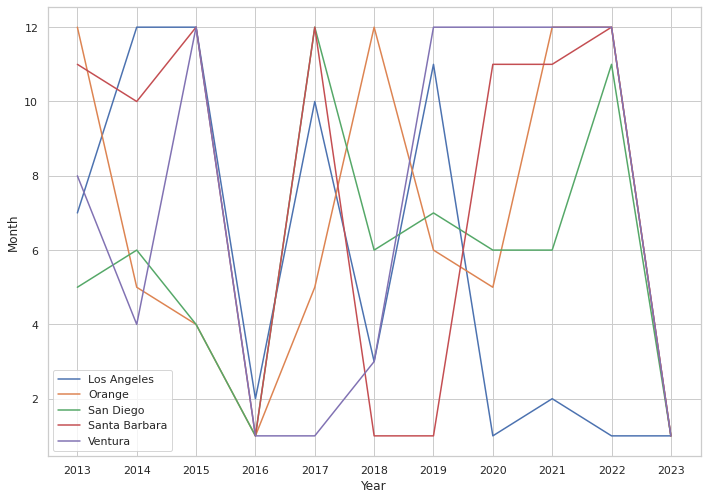

In [ ]:
# figure out 
grouped_data = time_series_south.groupby('county')
time_series_south['month'] = pd.DatetimeIndex(time_series_south['last_observation_date']).month
for county, group in grouped_data:
    plt.plot(group['year'], group['month'], label=county)

plt.legend()
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


In [ ]:
time_series_north = pd.read_sql('''
    WITH ranked_counties AS (
    SELECT county,
           strftime('%Y', observation_date) AS year,
           observation_count, 
           RANK() OVER (PARTITION BY county, strftime('%Y', observation_date) ORDER BY observation_count DESC) AS county_rank,
           observation_date
    FROM 'bird.csv'
    WHERE county IN('San Francisco', 'San Mateo', 'Marin', 'Humboldt', 'Alameda')
)
SELECT county, year, MAX(observation_date) AS last_observation_date
FROM ranked_counties
WHERE county_rank = 1
GROUP BY county, year;
''', data_bird_conn)
time_series_north

In [ ]:
time_series_north['last_observation_date'] = pd.to_datetime(time_series_north['last_observation_date'])
months = time_series_north['last_observation_date'].dt.month
time_series_north['month'] = months
time_series_north

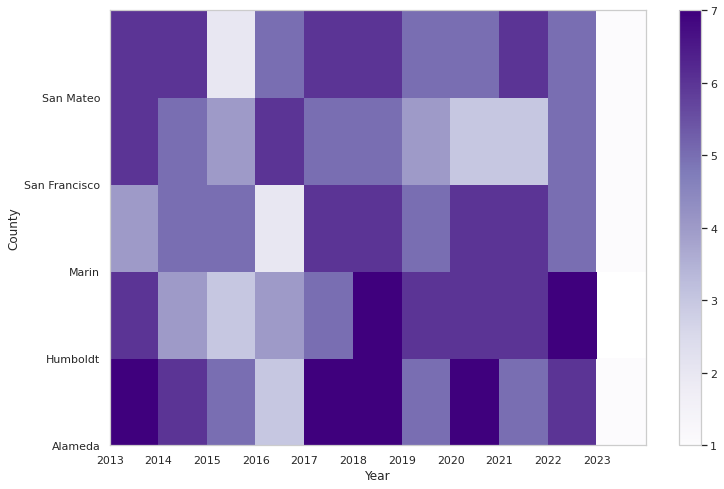

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# create pivot table
pivot_table = pd.pivot_table(time_series_north, values='last_observation_date', index='county', columns=time_series_north['last_observation_date'].dt.year, aggfunc=lambda x: x.dt.month)

# plot heatmap
plt.figure(figsize=(12,8))
plt.pcolor(pivot_table, cmap='Purples')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.xlabel('Year')
plt.ylabel('County')
plt.colorbar()
plt.show()
